In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [131]:
data = pd.read_csv('../input/insurance/insurance.csv')

Here in the above cell, insurance.csv is read and stored as data

In [132]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The above cell is executed to print the first 5 records of the data by using head() method

In [133]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


We used tail() method to print last five rows of data in the above cell

In [134]:
data.shape

(1338, 7)

The above cell is executed to know number of rows and columns. here in this data set there are 1338 rows and 7 columns

In [135]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

This gives the headings of all the columns of data used

In [136]:
data.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

Above cell is executed to find number of elements of particular category by using value_counts() method. we also used dtype to know unique elements. This data set has 3 categorical values, 2 integer columns, 2 float columns. 

In [137]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

It gives information about the data used

In [138]:
missing = data.isnull()

In [139]:
missing

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


If there is a value in rows or columns isnull() methods prints False
If there is no value in rows or columns isnull() methods prints True

here in our dataset it returns false,so there exists a value


In [140]:
missing = data.isnull().sum()

In [141]:
missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This gives number of null values in each rows and columns

# **HISTOGRAM**

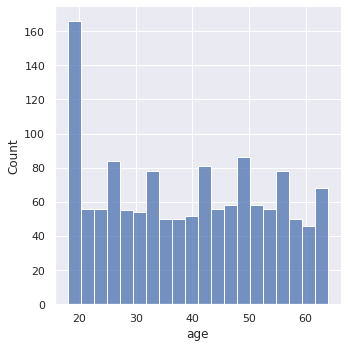

In [142]:
sns.set(rc={'figure.figsize': (12,8)}) 
sns.displot(data['age'], kde=False, bins=20);

In the above histogram, we observed that there many people of age 20 when compared to other age groups

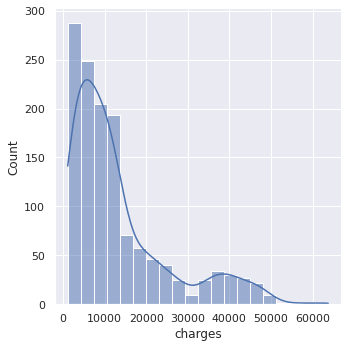

In [143]:
sns.set(rc={'figure.figsize': (12,8)}) 
sns.displot(data['charges'], kde=True, bins=20);

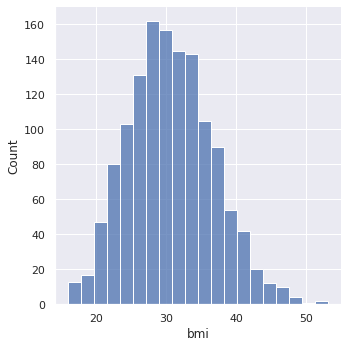

In [144]:
sns.set(rc={'figure.figsize': (12,8)}) 
sns.displot(data['bmi'], kde= False, bins=20);

This is distribution plot on age. Here we observe there are children, teenage, middle age and old people. the age of people starts from 10 and till 75 aged group are there. 

# Scatter plots

<AxesSubplot:xlabel='age', ylabel='charges'>

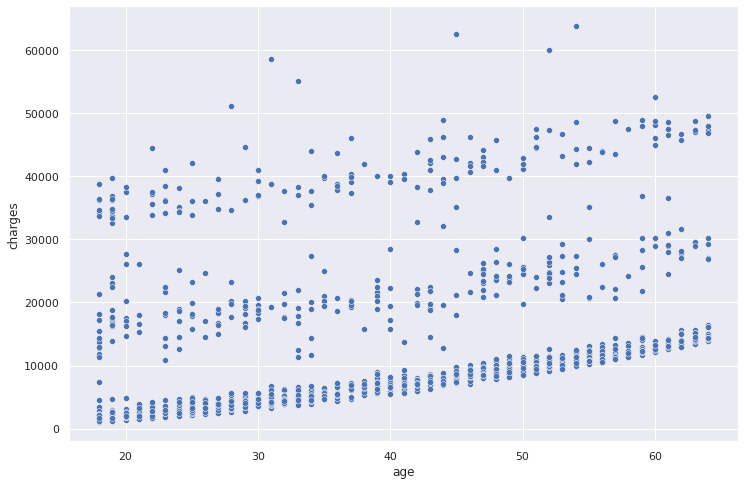

In [145]:
sns.scatterplot(x='age', y='charges', data=data)


Here Scatter plot is drawn between age and charges

# Correlation

In [146]:
numeric_features = data.select_dtypes(include = [np.number]) 
numeric_features.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

This is used to find how many columns are having numerical value so which is further used in the graphical representation for graphs. Here numeric columns are stored in variable called number .We can see that nearly 4 columns have numerical values outof 7 columns.

In [147]:
numeric_features1 = data.select_dtypes(exclude = ['O']) 
numeric_features1.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

The other way to find the numerical columns is to exclude all the columns having data types as objects. Here numeric columns are extracted exculding strings.

In [148]:
categorical_features = data.select_dtypes(include = [np.object]) 
categorical_features.columns

Index(['sex', 'smoker', 'region'], dtype='object')

By this method we can find the columns which are having categorical values and this method will return columns . It gives all the string columns.We have 3 categorical columns outof 7. And they are sex, smoker, region

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

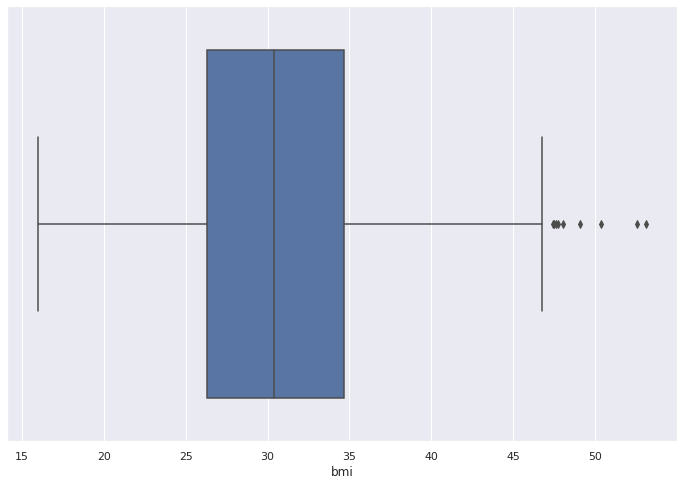

In [149]:
sns.boxplot(data['bmi'])

It is the boxplot on bmi and we can observe that median is in 30 to 35

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='charges'>

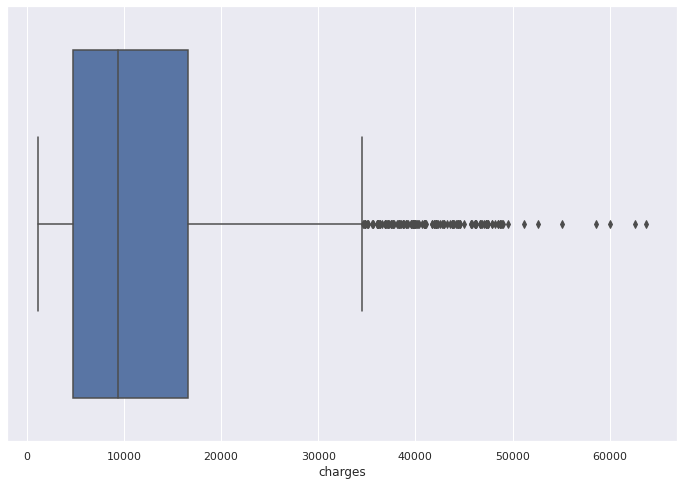

In [150]:
sns.boxplot(data['charges'])

In [151]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

It is observed that there are many ages found unique

In [152]:
data['age'].nunique()

47

number of unique ages found is 47

# VIOLIN PLOTS

<AxesSubplot:xlabel='age', ylabel='charges'>

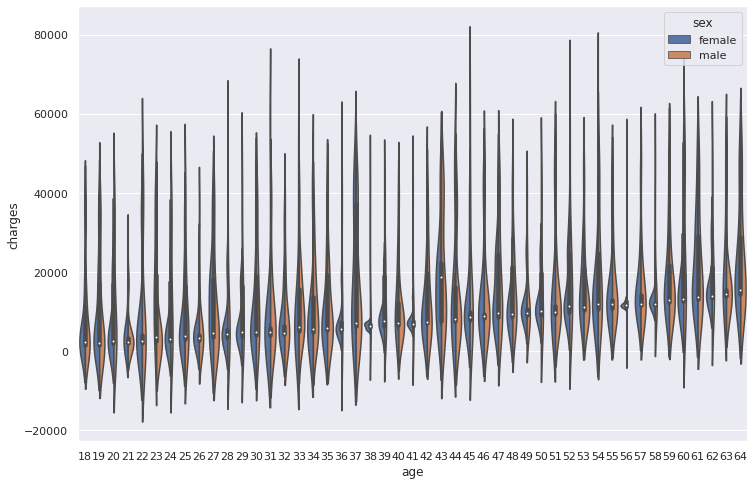

In [153]:
sns.violinplot(x='age', y='charges', hue='sex', data=data, split=True)

<AxesSubplot:xlabel='age', ylabel='children'>

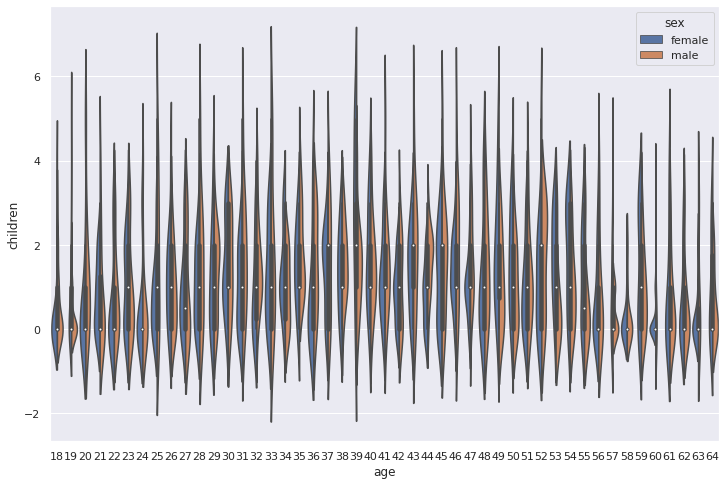

In [154]:
sns.violinplot(x='age', y='children', hue='sex', data=data, split=True)

By the above violin plot we can predict the age of children based on sex

# PAIR PLOT

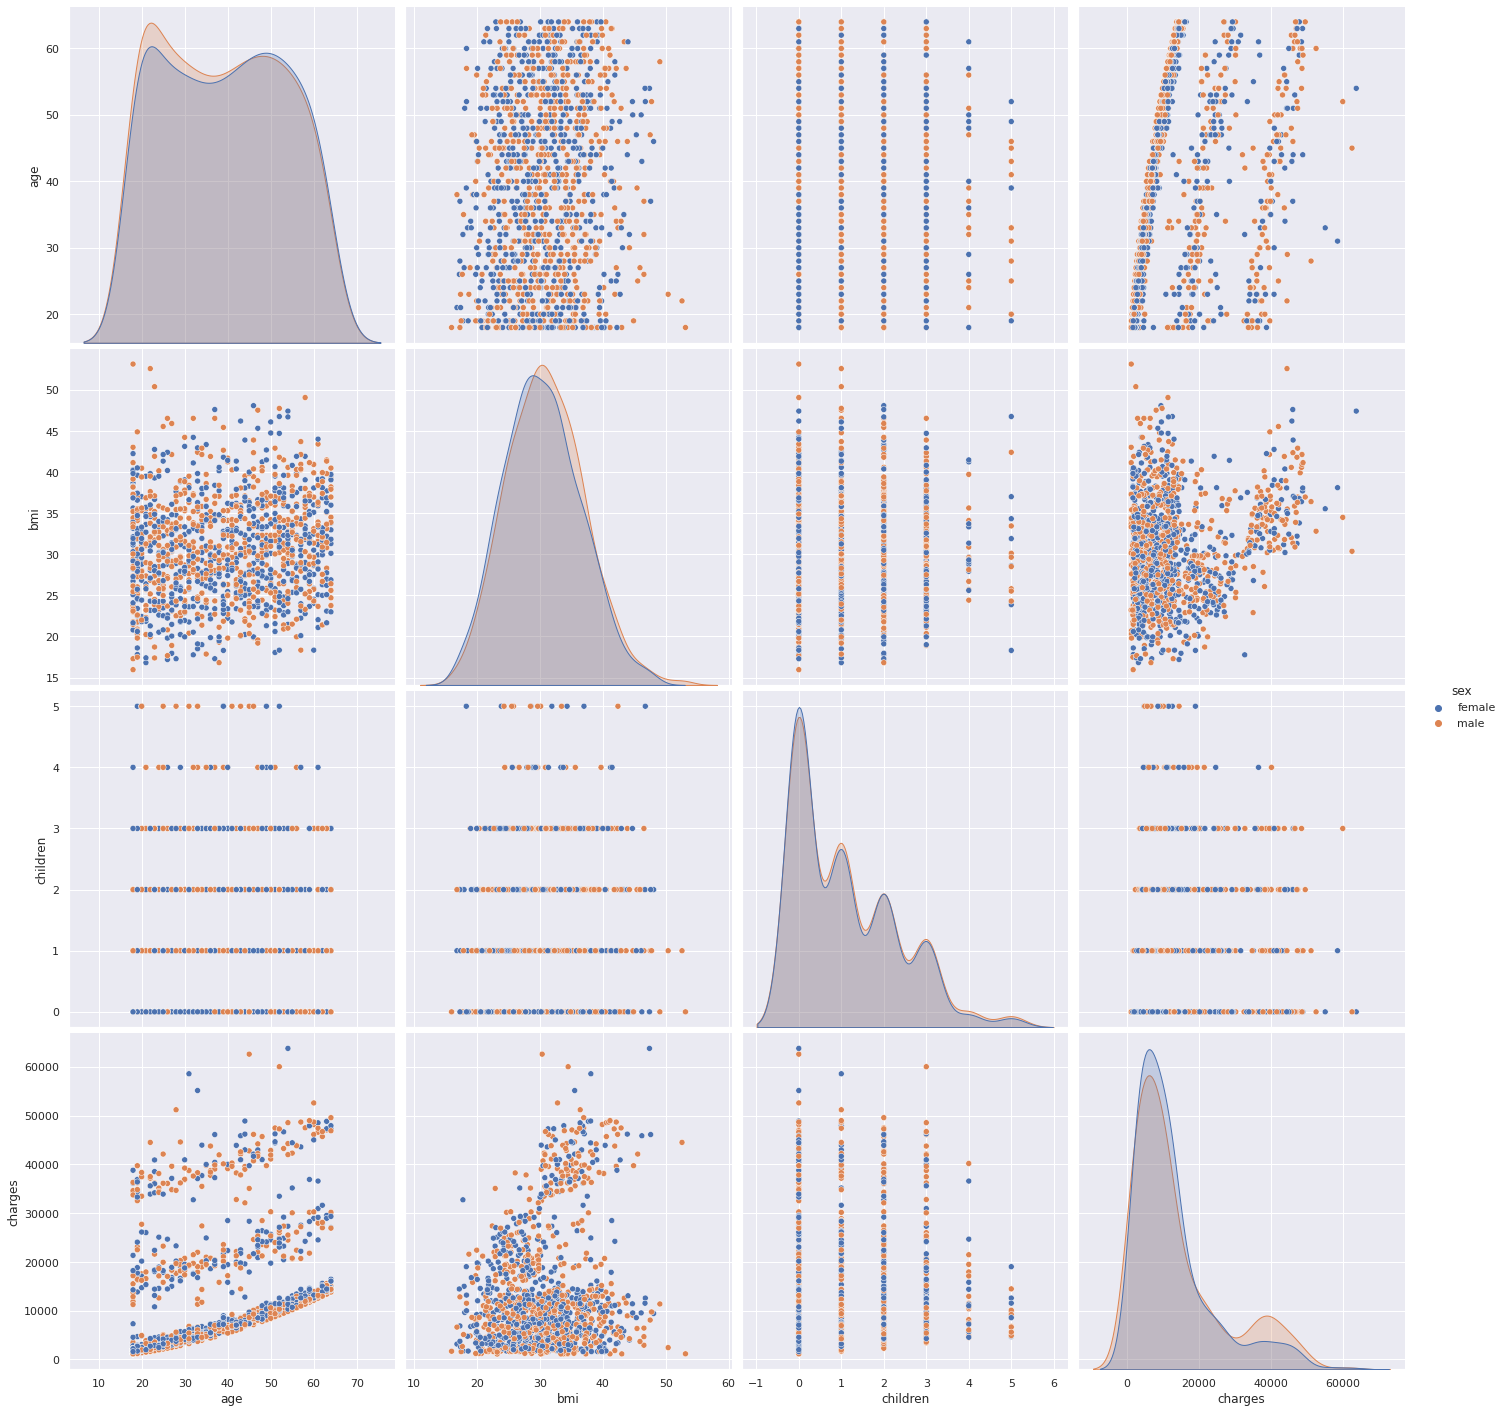

In [155]:
sns.pairplot(data=data, hue='sex', height=5) 
plt.show()

# LINE PLOT

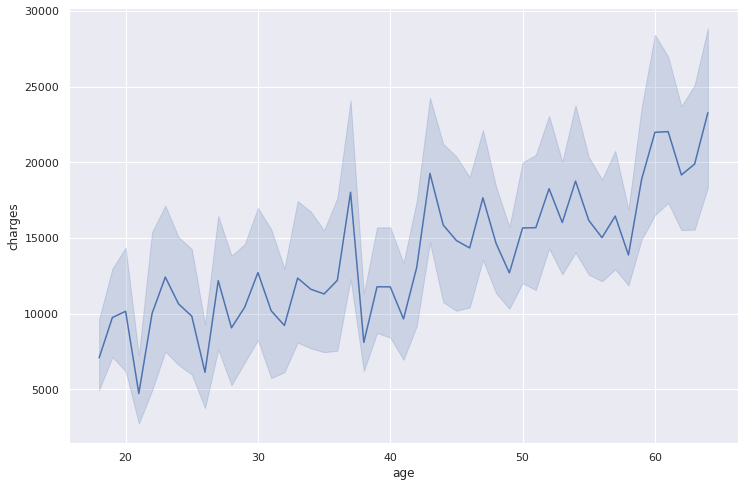

In [156]:
sns.lineplot(data=data,x="age",y="charges")
plt.show()

# *Conclusion*

Here by we conclude that, We have the data of Young people and old people too. In this data we observed that number of children for each people is from 0 to 5,many of the population has 1 children.There are no null values in this dataset.Most of the population are of age 20.Mainly we observed that Medical Cost of the population depends upon their age. As the age increases, charge spent on medical cost also increases. But in this data set it is also observed that in low age we have large medical cost in some cases. chargers spent on medical is higher for Male, as we compared with female.There are also smokers and non-smokers. If they are smokers,they have to spent large on Medical cost. Medical charges for smokers are very high than non-smokers.In this data,we observed that we have majority of non-smokers.In smokers ,majority are men. So,cost of treatment for men will be higher than women.It is also mentioned about BMI. From 30 obesity begins. Obese people spend much amount on treatment.Most of the spend on cheap charges.

Finally people with high BMI and smokers spent more on expensive treatments